In [515]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [516]:
# !pip install torch

In [517]:
# pip install nltk

In [518]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [519]:
!pwd

/Users/manlizhao/Desktop/Take Home Project


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [520]:
!ls

EDA.ipynb              dict_data.json         training_loan_data.csv
Project Guide.pdf      testing_loan_data.csv


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


### Step1: Load training data

In [521]:
train = pd.read_csv('./training_loan_data.csv',header = 1)

In [522]:
test = pd.read_csv('./testing_loan_data.csv')

/var/folders/tp/k1f107px41d6gt437332cg440000gn/T/ipykernel_15633/816452933.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('./testing_loan_data.csv')


In [523]:
test.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,20000001,22419852,10000,36 months,22.15%,8 years,RENT,37000.0,NaN,debt_consolidation,...,1,3.0,73.10%,16200,NaN,14877.170280,36809,1,131,NaN
1,20000002,22349118,1400,36 months,18.24%,6 years,RENT,41000.0,NaN,other,...,0,9.0,11.50%,4000,NaN,4097.304770,19536,1,19,NaN
2,20000003,22398818,7000,36 months,12.49%,3 years,RENT,68900.0,NaN,debt_consolidation,...,0,11.0,48.10%,11900,80.0,12688.495160,241465,1,92,NaN
3,20000004,22419015,18000,60 months,16.29%,9 years,MORTGAGE,41000.0,NaN,debt_consolidation,...,1,0.0,38.10%,7600,73.0,7908.799817,179757,1,235,NaN
4,20000005,22388614,12000,36 months,12.99%,10+ years,MORTGAGE,64000.0,NaN,home_improvement,...,0,NaN,57.90%,21000,NaN,19378.561060,31953,1,157,NaN


In [524]:
train.shape

(199121, 23)

In [525]:
train.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,...,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,...,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


In [526]:
train.rename(columns={'bad_flag': 'target'}, inplace = True)

### Step2: Examine data quality
- Inspect missing Value
- Data Cleaning for string data (text data cleaning)
- Check distribution for each variable and relationship with target variable (boxplot or histogram) 

####  Drop NA value based on target variable col 

In [527]:
train.isna().sum()

id                                  0
member_id                        9664
loan_amnt                           0
term                             9664
int_rate                         9664
emp_length                      17590
home_ownership                   9664
annual_inc                       9664
desc                           117117
purpose                          9664
percent_bc_gt_75                18702
bc_util                         18788
dti                              9664
inq_last_6mths                   9664
mths_since_recent_inq           37649
revol_util                       9791
total_bc_limit                  17159
mths_since_last_major_derog    166372
tot_hi_cred_lim                 17159
tot_cur_bal                     37405
application_approved_flag           0
internal_score                      0
target                           9664
dtype: int64

In [528]:
train['target'].value_counts(normalize= True)

target
0.0    0.930707
1.0    0.069293
Name: proportion, dtype: float64

In [529]:
train['target'].value_counts(normalize= True, dropna = False)

target
0.0    0.885537
1.0    0.065930
NaN    0.048533
Name: proportion, dtype: float64

In [530]:
train.dropna(subset=['target'], inplace=True)

In [531]:
train['target'].value_counts(normalize= True, dropna = False)

target
0.0    0.930707
1.0    0.069293
Name: proportion, dtype: float64

In [532]:
train.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
term                                0
int_rate                            0
emp_length                       7926
home_ownership                      0
annual_inc                          0
desc                           107453
purpose                             0
percent_bc_gt_75                 9038
bc_util                          9124
dti                                 0
inq_last_6mths                      0
mths_since_recent_inq           27985
revol_util                        127
total_bc_limit                   7495
mths_since_last_major_derog    156708
tot_hi_cred_lim                  7495
tot_cur_bal                     27741
application_approved_flag           0
internal_score                      0
target                              0
dtype: int64

In [533]:
train.dtypes

id                               int64
member_id                      float64
loan_amnt                        int64
term                            object
int_rate                        object
emp_length                      object
home_ownership                  object
annual_inc                     float64
desc                            object
purpose                         object
percent_bc_gt_75               float64
bc_util                        float64
dti                            float64
inq_last_6mths                 float64
mths_since_recent_inq          float64
revol_util                      object
total_bc_limit                 float64
mths_since_last_major_derog    float64
tot_hi_cred_lim                float64
tot_cur_bal                    float64
application_approved_flag        int64
internal_score                   int64
target                         float64
dtype: object

In [534]:
cat_cols = [col for col in train.columns if train[col].dtypes in ["object"]]

In [535]:
cat_cols

['term',
 'int_rate',
 'emp_length',
 'home_ownership',
 'desc',
 'purpose',
 'revol_util']

#### Data Cleaning

In [536]:
train.term

0          36 months
1          36 months
2          36 months
3          36 months
4          36 months
             ...    
199116     36 months
199117     60 months
199118     60 months
199119     36 months
199120     60 months
Name: term, Length: 189457, dtype: object

In [537]:
train['term'] = train['term'].str.split().str[0]

In [538]:
train['term'] = train['term'].astype(int)

In [539]:
train['int_rate']

0         16.24%
1         10.99%
2         10.99%
3          7.62%
4         13.53%
           ...  
199116    15.88%
199117    14.33%
199118    16.78%
199119    19.52%
199120    10.64%
Name: int_rate, Length: 189457, dtype: object

In [540]:
train['int_rate'] = train['int_rate'].str.replace('%', '').astype(float)

In [541]:
train['int_rate']

0         16.24
1         10.99
2         10.99
3          7.62
4         13.53
          ...  
199116    15.88
199117    14.33
199118    16.78
199119    19.52
199120    10.64
Name: int_rate, Length: 189457, dtype: float64

#### Check distribution and relationship

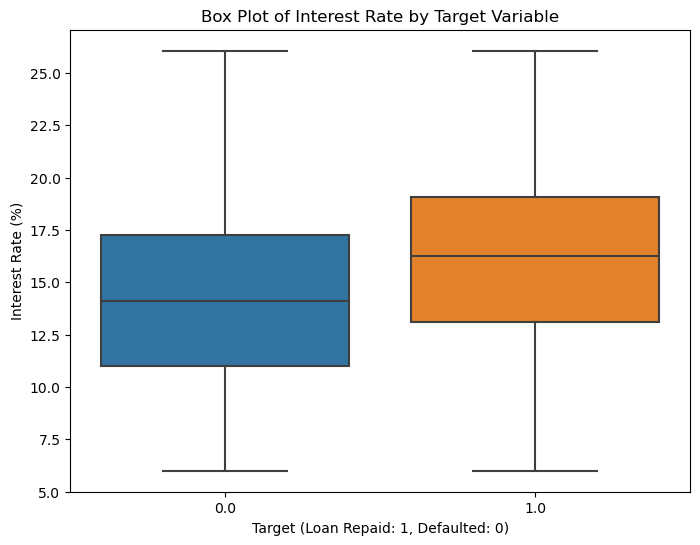

In [542]:
# Boxplot for interest rates by target variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='int_rate', data=train)
plt.title("Box Plot of Interest Rate by Target Variable")
plt.xlabel("Target (Loan Repaid: 1, Defaulted: 0)")
plt.ylabel("Interest Rate (%)")
plt.show()


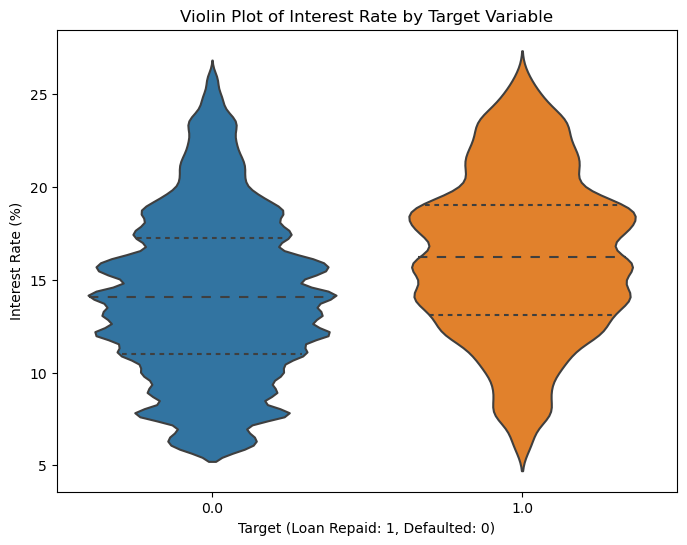

In [543]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='int_rate', data=train, inner='quartile')
plt.title("Violin Plot of Interest Rate by Target Variable")
plt.xlabel("Target (Loan Repaid: 1, Defaulted: 0)")
plt.ylabel("Interest Rate (%)")
plt.show()

In [544]:
train['emp_length'].unique()

array(['3 years', '10+ years', '4 years', '5 years', '2 years', '7 years',
       '6 years', '1 year', '9 years', '< 1 year', '8 years', nan],
      dtype=object)

In [545]:
train['emp_length'].value_counts(dropna = False)

emp_length
10+ years    61648
2 years      16257
5 years      14361
3 years      14058
< 1 year     13312
6 years      11981
1 year       11504
7 years      11287
4 years      10905
8 years       9040
NaN           7926
9 years       7178
Name: count, dtype: int64

In [546]:
train['emp_length'] =train['emp_length'].fillna('UNKNOWN')

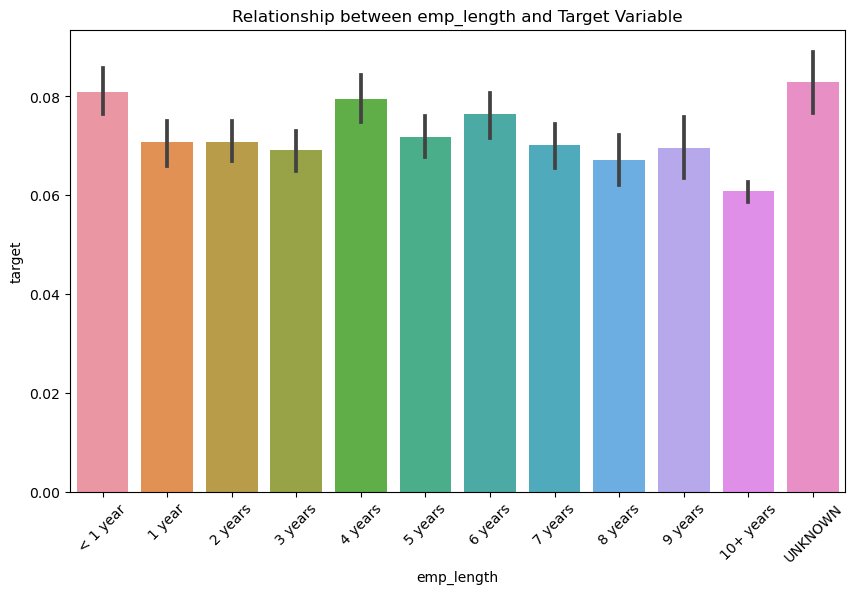

In [547]:
custom_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', 
                '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years','UNKNOWN']

# Plot the barplot with the custom order
plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length', y='target', data=train, estimator=np.mean, order=custom_order)
plt.xticks(rotation=45)
plt.title("Relationship between emp_length and Target Variable")
plt.show()

##### loan_amt doesn't seem to provide information to predict target variable

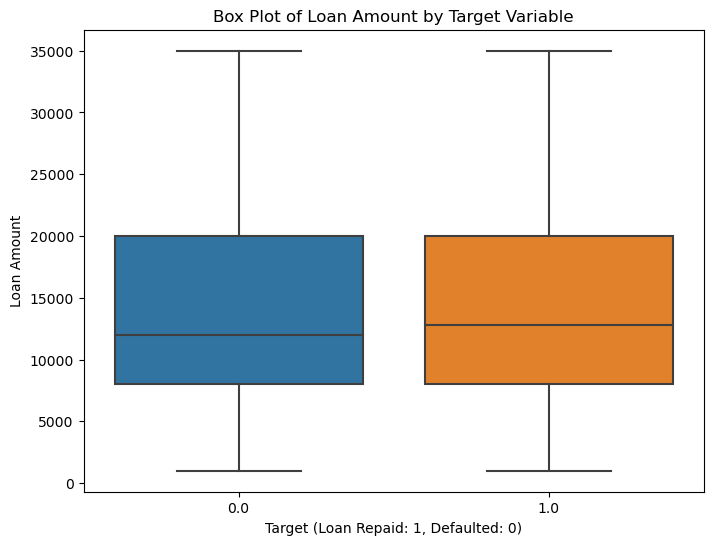

In [548]:
# Boxplot for loan amounts by target variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='loan_amnt', data=train)
plt.title("Box Plot of Loan Amount by Target Variable")
plt.xlabel("Target (Loan Repaid: 1, Defaulted: 0)")
plt.ylabel("Loan Amount")
plt.show()

In [549]:
train['home_ownership'].value_counts(dropna = False)

home_ownership
MORTGAGE    97647
RENT        76149
OWN         15573
OTHER          46
NONE           42
Name: count, dtype: int64

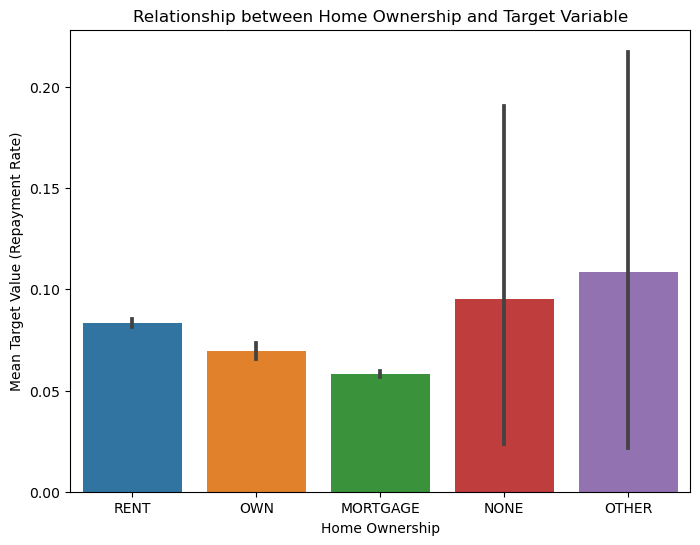

In [550]:
# Bar plot of home_ownership vs target
plt.figure(figsize=(8, 6))
sns.barplot(x='home_ownership', y='target', data=train, estimator=np.mean)
plt.title("Relationship between Home Ownership and Target Variable")
plt.xlabel("Home Ownership")
plt.ylabel("Mean Target Value (Repayment Rate)")
plt.show()

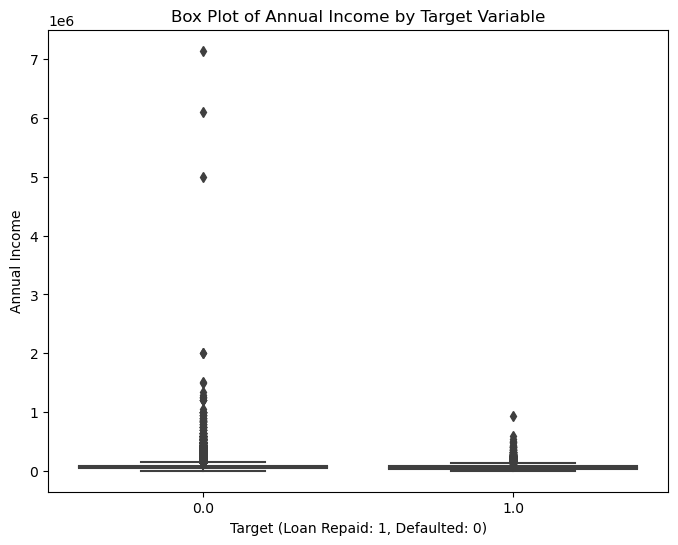

In [551]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='annual_inc', data=train)
plt.title("Box Plot of Annual Income by Target Variable")
plt.xlabel("Target (Loan Repaid: 1, Defaulted: 0)")
plt.ylabel("Annual Income")
plt.show()

##### `Desc` column can be used to generate embedding features 

In [552]:
train['desc'].sample

<bound method NDFrame.sample of 0                                                       NaN
1           Borrower added on 12/31/13 > Combining high ...
2           Borrower added on 12/31/13 > I would like to...
3                                                       NaN
4                                                       NaN
                                ...                        
199116                                                  NaN
199117                                                  NaN
199118      Borrower added on 09/05/13 > I'm surprised t...
199119                                                  NaN
199120      Borrower added on 09/05/13 > Funds will be u...
Name: desc, Length: 189457, dtype: object>

In [553]:
for i, text in train['desc'].dropna().head(10).items():
    print(f"Row {i}: {text}")

Row 1:   Borrower added on 12/31/13 > Combining high interest credit cards to lower interest rate.<br>
Row 2:   Borrower added on 12/31/13 > I would like to use this money to payoff existing credit card debt and use the remaining about to purchase a used car that is fuel efficient.<br>
Row 5:   Borrower added on 12/31/13 > This loan is for debt consolidation - to close credit cards, pay off other debt, finally make a dent in my total debt amount. I already have plans to close all but 2 of my credit cards, and to pay a collection I didn't know about. I want my credit clean with one easy payment.<br>
Row 6:   Borrower added on 12/31/13 > Just bought a house, and would like a little extra funds to improve aspects of the house such as, duct work, electrical outlets, backyard, and other minor areas.<br>
Row 8:   Borrower added on 12/31/13 > My goal is to purchase a home. I am consolidating my debt to lower interest rate to pay off debt faster. My goal is targeted for February 2015.<br>
Row 

In [554]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manlizhao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [555]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Custom cleaning function with lemmatization
def clean_text(text):
    text = re.sub(r'Borrower added on \d{2}/\d{2}/\d{2}', '', text)  # Remove "Borrower added on XX/XX/XX"
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    stop_words = set(stopwords.words('english'))  # Stopwords
    custom_stopwords = ['also', 'one', 'thank', 'added', 'help']  # Custom stopwords
    stop_words.update(custom_stopwords)

    # Lemmatize words and remove stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function to the 'desc' column
train['desc_clean'] = train['desc'].fillna('').apply(clean_text)

In [600]:
train['percent_bc_gt_75'] = train['percent_bc_gt_75'].fillna(-1)
train['mths_since_recent_inq'] = train['mths_since_recent_inq'].fillna(-1)
train['revol_util'] = train['revol_util'].fillna(-1)
train['total_bc_limit'] = train['total_bc_limit'].fillna(-1)
train['mths_since_last_major_derog'] = train['mths_since_last_major_derog'].fillna(-1)
train['tot_hi_cred_lim'] = train['tot_hi_cred_lim'].fillna(-1)
train['bc_util'] = train['bc_util'].fillna(-1)
train['tot_cur_bal'] = train['tot_cur_bal'].fillna(-1)

In [557]:
# pip install transformers sentence-transformers

In [558]:
from sentence_transformers import SentenceTransformer

In [559]:
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight version of BERT for sentence embeddings

In [560]:
# Replace NaN values with empty strings
train['desc_clean'] = train['desc'].fillna('')

# Generate embeddings for each sentence
embeddings = model.encode(train['desc_clean'].tolist(), show_progress_bar=True)


# Check the shape of the embeddings
print(embeddings.shape)  # Output: (num_samples, embedding_dimension)


Batches:   0%|          | 0/5921 [00:00<?, ?it/s]

(189457, 384)


In [642]:
# Convert embeddings to a DataFrame
embedding_df = pd.DataFrame(embeddings, columns=[f"emb_{i}" for i in range(embeddings.shape[1])])

# Check the final DataFrame
print(embedding_df.head())

      emb_0     emb_1     emb_2     emb_3     emb_4     emb_5     emb_6  \
0 -0.118838  0.048299 -0.002548 -0.011011  0.051951  0.010292  0.115433   
1 -0.016725  0.019047 -0.057689 -0.011482 -0.036666 -0.046300 -0.061627   
2 -0.063132  0.054802 -0.066237  0.000658 -0.042626 -0.029217 -0.014651   
3 -0.118838  0.048299 -0.002548 -0.011011  0.051951  0.010292  0.115433   
4 -0.118838  0.048299 -0.002548 -0.011011  0.051951  0.010292  0.115433   

      emb_7     emb_8     emb_9  ...   emb_374   emb_375   emb_376   emb_377  \
0  0.000701 -0.085925 -0.070654  ...  0.107304  0.011428  0.013367 -0.012748   
1  0.060359 -0.000280 -0.033620  ...  0.008762 -0.031960 -0.036192  0.026331   
2  0.068966 -0.045289 -0.022697  ...  0.027460 -0.033327 -0.038049  0.083682   
3  0.000701 -0.085925 -0.070654  ...  0.107304  0.011428  0.013367 -0.012748   
4  0.000701 -0.085925 -0.070654  ...  0.107304  0.011428  0.013367 -0.012748   

    emb_378   emb_379   emb_380   emb_381   emb_382   emb_383  
0  0

In [643]:
# Concatenate embeddings with the original train DataFrame
train_with_embeddings = pd.concat([train.reset_index(drop=True), embedding_df.reset_index(drop=True)], axis=1)

print(train_with_embeddings.head())

         id   member_id  loan_amnt  term  int_rate emp_length home_ownership  \
0  10000001  11983056.0       7550    36     16.24    3 years           RENT   
1  10000002  12002921.0      27050    36     10.99  10+ years            OWN   
2  10000003  11983096.0      12000    36     10.99    4 years           RENT   
3  10000004  12003142.0      28000    36      7.62    5 years       MORTGAGE   
4  10000005  11993233.0      12000    36     13.53  10+ years           RENT   

   annual_inc                                               desc  \
0     28000.0                                                NaN   
1     55000.0    Borrower added on 12/31/13 > Combining high ...   
2     60000.0    Borrower added on 12/31/13 > I would like to...   
3    325000.0                                                NaN   
4     40000.0                                                NaN   

              purpose  ...   emb_374   emb_375   emb_376   emb_377   emb_378  \
0  debt_consolidation  ...  0.

In [644]:
train_with_embeddings['target']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
189452    0.0
189453    0.0
189454    0.0
189455    0.0
189456    0.0
Name: target, Length: 189457, dtype: float64

In [563]:
train['purpose'].value_counts(dropna = False)

purpose
debt_consolidation    112259
credit_card            43431
home_improvement       10362
other                   8947
major_purchase          3681
small_business          2758
car                     1962
medical                 1524
wedding                 1347
house                   1099
moving                  1050
vacation                 915
renewable_energy         122
Name: count, dtype: int64

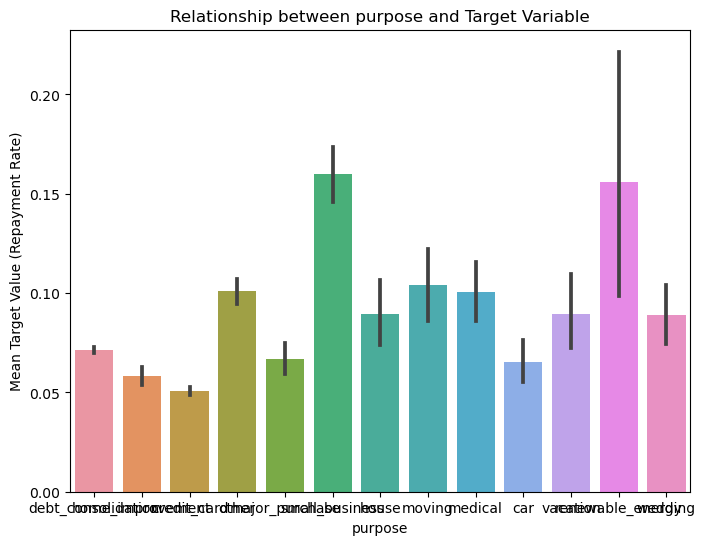

In [564]:
plt.figure(figsize=(8, 6))
sns.barplot(x='purpose', y='target', data=train, estimator=np.mean)
plt.title("Relationship between purpose and Target Variable")
plt.xlabel("purpose")
plt.ylabel("Mean Target Value (Repayment Rate)")
plt.show()

In [565]:
train.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
term                                0
int_rate                            0
emp_length                          0
home_ownership                      0
annual_inc                          0
desc                           107453
purpose                             0
percent_bc_gt_75                    0
bc_util                          9124
dti                                 0
inq_last_6mths                      0
mths_since_recent_inq               0
revol_util                          0
total_bc_limit                      0
mths_since_last_major_derog         0
tot_hi_cred_lim                     0
tot_cur_bal                         0
application_approved_flag           0
internal_score                      0
target                              0
desc_clean                          0
dtype: int64

In [566]:
train.target.value_counts()

target
0.0    176329
1.0     13128
Name: count, dtype: int64

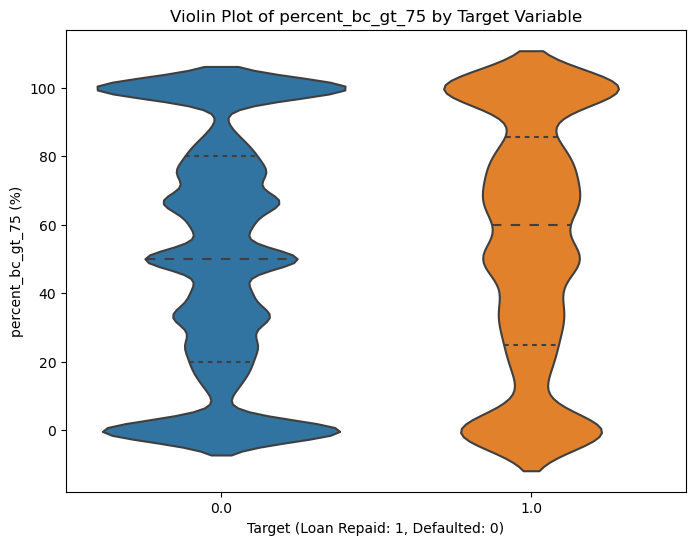

In [567]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y = 'percent_bc_gt_75', data=train, inner='quartile')
plt.title("Violin Plot of percent_bc_gt_75 by Target Variable")
plt.xlabel("Target (Loan Repaid: 1, Defaulted: 0)")
plt.ylabel("percent_bc_gt_75 (%)")
plt.show()

In [568]:
train.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
term                                0
int_rate                            0
emp_length                          0
home_ownership                      0
annual_inc                          0
desc                           107453
purpose                             0
percent_bc_gt_75                    0
bc_util                          9124
dti                                 0
inq_last_6mths                      0
mths_since_recent_inq               0
revol_util                          0
total_bc_limit                      0
mths_since_last_major_derog         0
tot_hi_cred_lim                     0
tot_cur_bal                         0
application_approved_flag           0
internal_score                      0
target                              0
desc_clean                          0
dtype: int64

In [569]:
train.shape

(189457, 24)

In [570]:
train['mths_since_last_major_derog'].value_counts()

mths_since_last_major_derog
-1.0      156708
 38.0        573
 40.0        565
 41.0        564
 42.0        563
           ...  
 114.0         1
 134.0         1
 146.0         1
 138.0         1
 135.0         1
Name: count, Length: 136, dtype: int64

<Axes: xlabel='mths_since_last_major_derog', ylabel='Count'>

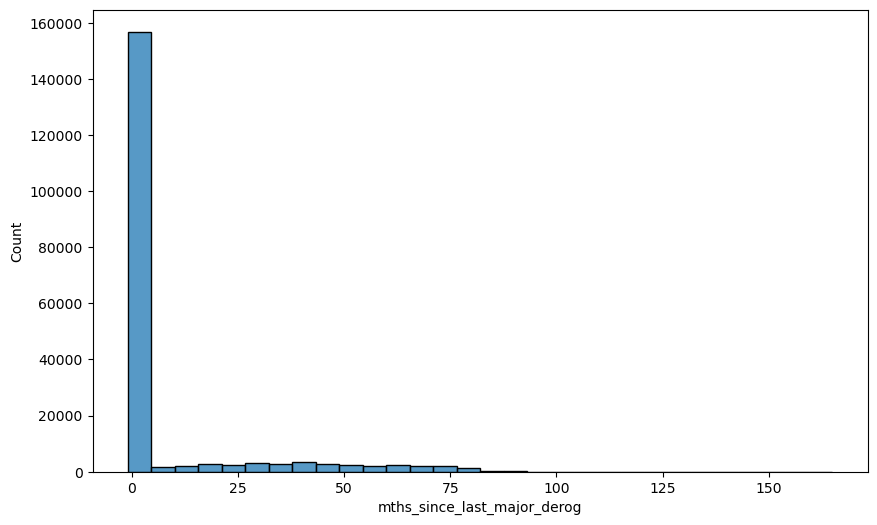

In [571]:
plt.figure(figsize=(10, 6))
sns.histplot(train['mths_since_last_major_derog'].dropna(), bins=30, kde=False)

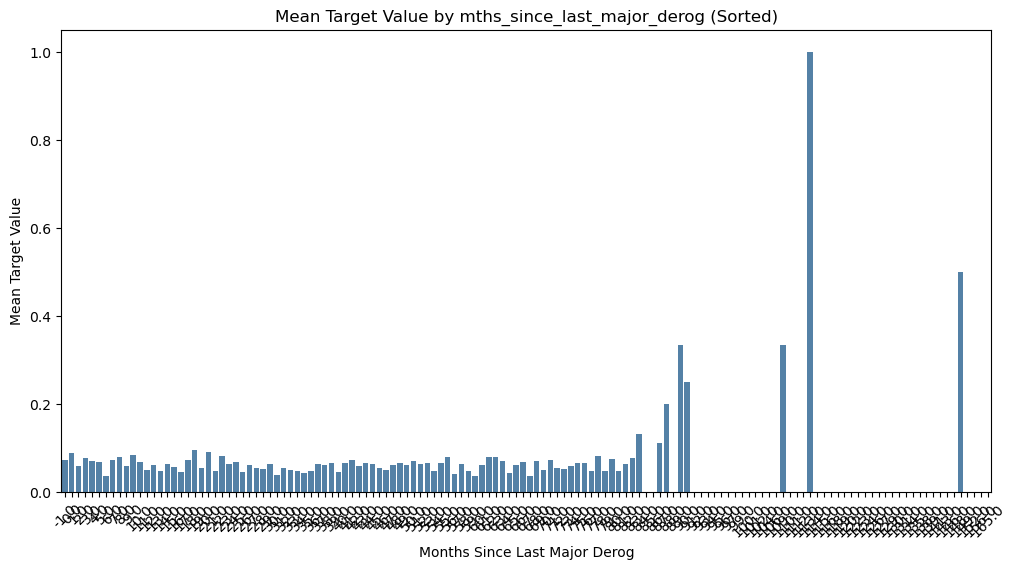

In [572]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_target_per_group = train.groupby('mths_since_last_major_derog')['target'].mean().reset_index()

mean_target_per_group = mean_target_per_group.sort_values(by='mths_since_last_major_derog')

plt.figure(figsize=(12, 6))
sns.barplot(x='mths_since_last_major_derog', y='target', data=mean_target_per_group, color='steelblue')

# Customize the plot
plt.title("Mean Target Value by mths_since_last_major_derog (Sorted)")
plt.xlabel("Months Since Last Major Derog")
plt.ylabel("Mean Target Value")
plt.xticks(rotation=45)  
plt.show()



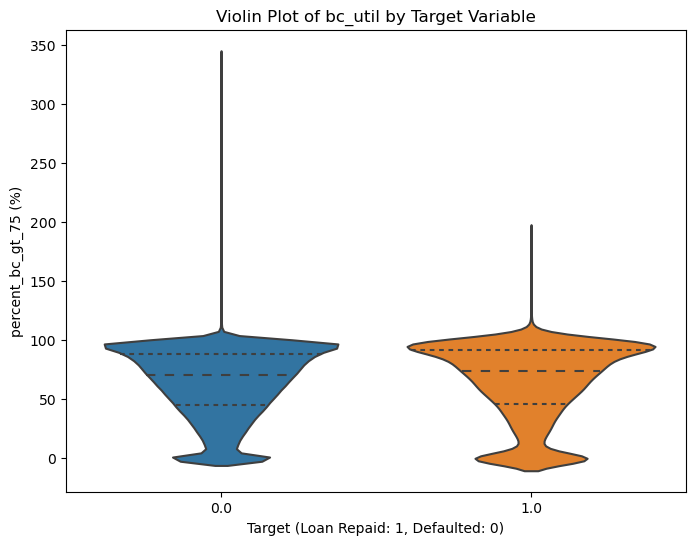

In [574]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y = 'bc_util', data=train, inner='quartile')
plt.title("Violin Plot of bc_util by Target Variable")
plt.xlabel("Target (Loan Repaid: 1, Defaulted: 0)")
plt.ylabel("percent_bc_gt_75 (%)")
plt.show()

In [575]:
exclude_cols = ['desc']

In [608]:
# train_with_embeddings['bc_util'] = train_with_embeddings['bc_util'].fillna(-1)
train_with_embeddings.drop(['desc'],axis = 1, inplace = True)

In [609]:
# Find columns with missing values
columns_with_nan = train_with_embeddings.columns[train_with_embeddings.isnull().any()]

# Print the column names
print("Columns with missing values:")
print(columns_with_nan)

Columns with missing values:
Index([], dtype='object')


### Model Training

In [615]:
exclude_cols = ['id', 'member_id']  
target_col = 'target'

In [645]:
# Select features: all numerical features except the target
features = train_with_embeddings.drop(columns=exclude_cols+ [target_col], errors='ignore')
target = train_with_embeddings[target_col]

In [677]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import class_weight
from torch.utils.data import WeightedRandomSampler
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [647]:
non_numeric_cols = features.select_dtypes(include=['object', 'category']).columns
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    features[col] = label_encoder.fit_transform(features[col].astype(str))

In [648]:
train_data, val_data, train_labels, val_labels = train_test_split(
    features, target, test_size=0.2, random_state=78
)

In [649]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)

In [650]:
# Convert target to a single binary column
train_labels = train_labels.astype(int)  # Ensure target is integer
val_labels = val_labels.astype(int)

# Verify target values are 0 or 1
print(train_labels.value_counts())
print(val_labels.value_counts())

target
0    141122
1     10443
Name: count, dtype: int64
target
0    35207
1     2685
Name: count, dtype: int64


In [693]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_auc_score
import numpy as np

# Convert data to PyTorch tensors
X_train = torch.tensor(train_data, dtype=torch.float32)
y_train = torch.tensor(train_labels.values, dtype=torch.float32).unsqueeze(1)
X_val = torch.tensor(val_data, dtype=torch.float32)
y_val = torch.tensor(val_labels.values, dtype=torch.float32).unsqueeze(1)

# DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Model, Loss, Optimizer
input_size = X_train.shape[1]  # Number of features
hidden_size = 64
model = NeuralNet(input_size, hidden_size)

criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)  # Learning Rate Scheduler

# Early Stopping Parameters
patience = 5  # Number of epochs to wait for improvement
best_roc_auc = 0.0
epochs_no_improve = 0

# Training Loop
num_epochs = 50
for epoch in range(num_epochs):
    # Training Phase
    model.train()
    train_loss = 0
    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation Phase
    model.eval()
    val_preds = []
    val_targets = []
    val_loss = 0

    with torch.no_grad():
        for val_X, val_y in val_loader:
            val_outputs = model(val_X)
            loss = criterion(val_outputs, val_y)
            val_loss += loss.item()

            val_preds.extend(val_outputs.squeeze().cpu().numpy())
            val_targets.extend(val_y.squeeze().cpu().numpy())

    # Calculate ROC-AUC
    roc_auc = roc_auc_score(val_targets, val_preds)

    # Step the scheduler
    scheduler.step()

    # Print metrics
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss/len(train_loader):.4f}, "
          f"Val Loss: {val_loss/len(val_loader):.4f}, "
          f"ROC-AUC: {roc_auc:.4f}, "
          f"Learning Rate: {scheduler.get_last_lr()[0]:.6f}")

    # Early Stopping Check
    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"Early stopping triggered after {epoch+1} epochs.")
        break

# Load the Best Model
model.load_state_dict(torch.load('best_model.pth'))

# Final ROC-AUC
model.eval()
final_preds = []
final_targets = []

with torch.no_grad():
    for val_X, val_y in val_loader:
        val_outputs = model(val_X)
        final_preds.extend(val_outputs.squeeze().cpu().numpy())
        final_targets.extend(val_y.squeeze().cpu().numpy())

final_roc_auc = roc_auc_score(final_targets, final_preds)
print(f"Final Validation ROC-AUC: {final_roc_auc:.4f}")


Epoch [1/50], Train Loss: 0.2626, Val Loss: 0.2900, ROC-AUC: 0.6570, Learning Rate: 0.010000
Epoch [2/50], Train Loss: 0.2577, Val Loss: 0.2483, ROC-AUC: 0.6657, Learning Rate: 0.010000
Epoch [3/50], Train Loss: 0.2538, Val Loss: 0.2780, ROC-AUC: 0.6216, Learning Rate: 0.010000
Epoch [4/50], Train Loss: 0.2517, Val Loss: 0.2510, ROC-AUC: 0.6462, Learning Rate: 0.010000
Epoch [5/50], Train Loss: 0.2484, Val Loss: 0.2559, ROC-AUC: 0.6356, Learning Rate: 0.001000
Epoch [6/50], Train Loss: 0.2367, Val Loss: 0.2420, ROC-AUC: 0.6854, Learning Rate: 0.001000
Epoch [7/50], Train Loss: 0.2351, Val Loss: 0.2414, ROC-AUC: 0.6903, Learning Rate: 0.001000
Epoch [8/50], Train Loss: 0.2347, Val Loss: 0.2414, ROC-AUC: 0.6893, Learning Rate: 0.001000
Epoch [9/50], Train Loss: 0.2328, Val Loss: 0.2416, ROC-AUC: 0.6912, Learning Rate: 0.001000
Epoch [10/50], Train Loss: 0.2311, Val Loss: 0.2438, ROC-AUC: 0.6874, Learning Rate: 0.000100
Epoch [11/50], Train Loss: 0.2275, Val Loss: 0.2431, ROC-AUC: 0.6896,

/var/folders/tp/k1f107px41d6gt437332cg440000gn/T/ipykernel_15633/730063120.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model

In [695]:
!ls

EDA.ipynb              best_model.pth         testing_loan_data.csv
Project Guide.pdf      dict_data.json         training_loan_data.csv


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [696]:
test = pd.read_csv('testing_loan_data.csv')

/var/folders/tp/k1f107px41d6gt437332cg440000gn/T/ipykernel_15633/1094202982.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('testing_loan_data.csv')


In [698]:
test.shape

(102505, 23)